# Phone versus Price analysis with visualizations

### Import required modules for analysis

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Data layout and information

### Show data array layout

In [20]:
phone_df = pd.read_csv("cleaned_all_phones.csv")
phone_df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


### Get data type information

In [21]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

### Listing unique brands

In [22]:
phone_df['brand'].unique()

array(['Huawei', 'LG', 'Xiaomi', 'Sony', 'Oppo', 'Samsung', 'Lenovo',
       'Apple', 'Google', 'Honor', 'Realme', 'OnePlus', 'Vivo'],
      dtype=object)

### Create seperate dataframe with `Apple` brands only

In [23]:
seperated_df = (phone_df.brand == 'Apple')
apple_devices = phone_df[seperated_df]
apple_devices.head()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,iPhone 8,Apple,iOS 11,4.7,750x1334,1821,Li-Ion,2,2017-09-12,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,iPhone X,Apple,iOS 11.1.1,5.8,1125x2436,2716,Li-Ion,3,2017-09-12,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,iPhone XS Max,Apple,iOS 12,6.5,1242x2688,3174,Li-Ion,4,2018-09-12,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,iPhone XS,Apple,iOS 12,5.8,1125x2436,2658,Li-Ion,4,2018-09-12,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,iPhone XR,Apple,iOS 12,6.1,828x1792,2942,Li-Ion,3,2018-09-12,194.0,...,True,True,False,True,True,True,True,False,False,310.0


## Encoding String and boolean values to integer

### Show all the unique values of the `phone_name` column

In [24]:
apple_devices['phone_name'].unique()

array(['iPhone 8', 'iPhone X', 'iPhone XS Max', 'iPhone XS', 'iPhone XR',
       'iPhone 11 Pro Max', 'iPhone 11 Pro', 'iPhone 11',
       'iPhone SE (2020)', 'iPhone 12 Pro', 'iPhone 12',
       'iPhone 12 Pro Max', 'iPhone 12 mini', 'iPhone 13 Pro Max',
       'iPhone 13 mini', 'iPhone 13', 'iPhone 13 Pro', 'iPhone SE (2022)',
       'iPhone 14 Pro Max', 'iPhone 14 Pro', 'iPhone 14 Plus',
       'iPhone 14'], dtype=object)

### Convert the unique string values in the `phone_names` column into integers

In [25]:
treated_apple_devices = apple_devices.replace (apple_devices["phone_name"].unique(), 
[x for x in range(len(apple_devices["phone_name"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,iOS 11,4.7,750x1334,1821,Li-Ion,2,2017-09-12,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,iOS 11.1.1,5.8,1125x2436,2716,Li-Ion,3,2017-09-12,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,iOS 12,6.5,1242x2688,3174,Li-Ion,4,2018-09-12,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,iOS 12,5.8,1125x2436,2658,Li-Ion,4,2018-09-12,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,iOS 12,6.1,828x1792,2942,Li-Ion,3,2018-09-12,194.0,...,True,True,False,True,True,True,True,False,False,310.0


### Show all the unique values of the `os` column

In [26]:
apple_devices["os"].unique()

array(['iOS 11', 'iOS 11.1.1', 'iOS 12', 'iOS 13', 'iOS 14.1', 'iOS 15',
       'iOS 15.4', 'iOS 16'], dtype=object)

### Convert the unique string values in the `os` column into integers

In [27]:
treated_apple_devices = treated_apple_devices.replace (apple_devices["os"].unique(), 
[x for x in range(len(apple_devices["os"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,Li-Ion,2,2017-09-12,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,1,5.8,1125x2436,2716,Li-Ion,3,2017-09-12,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,2,6.5,1242x2688,3174,Li-Ion,4,2018-09-12,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,2,5.8,1125x2436,2658,Li-Ion,4,2018-09-12,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,2,6.1,828x1792,2942,Li-Ion,3,2018-09-12,194.0,...,True,True,False,True,True,True,True,False,False,310.0


### Show all the unique values of the `battery_type` column

In [28]:
apple_devices["battery_type"].unique()

array(['Li-Ion'], dtype=object)

### Replace string values in `battery_type` column with integers

In [29]:
treated_apple_devices = treated_apple_devices.replace(apple_devices["battery_type"].unique(),
[x for x in range(len(apple_devices["battery_type"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,0,2,2017-09-12,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,1,5.8,1125x2436,2716,0,3,2017-09-12,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,2,6.5,1242x2688,3174,0,4,2018-09-12,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,2,5.8,1125x2436,2658,0,4,2018-09-12,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,2,6.1,828x1792,2942,0,3,2018-09-12,194.0,...,True,True,False,True,True,True,True,False,False,310.0


### Display the unique values in the `announcement_date` column

In [30]:
apple_devices["announcement_date"].unique()

array(['2017-09-12', '2018-09-12', '2019-09-10', '2020-04-15',
       '2020-10-13', '2021-09-14', '2022-03-08', '2022-09-07'],
      dtype=object)

### Replace string values in `announcement_date` with integers

In [31]:
treated_apple_devices = treated_apple_devices.replace(apple_devices["announcement_date"].unique(),
[x for x in range(len(apple_devices["announcement_date"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,0,2,0,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,1,5.8,1125x2436,2716,0,3,0,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,2,6.5,1242x2688,3174,0,4,1,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,2,5.8,1125x2436,2658,0,4,1,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,2,6.1,828x1792,2942,0,3,1,194.0,...,True,True,False,True,True,True,True,False,False,310.0


### 

### Replace all `True` and `False` booleans with integer values `1` for `True` and `0` for `False`

In [32]:
treated_apple_devices = treated_apple_devices.replace([True, False], [1,0])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,0,2,0,148.0,...,1,1,0,1,1,1,1,0,0,210.0
63,1,Apple,1,5.8,1125x2436,2716,0,3,0,174.0,...,1,1,0,1,1,1,1,0,0,280.0
201,2,Apple,2,6.5,1242x2688,3174,0,4,1,208.0,...,1,1,0,1,1,1,1,0,0,570.0
202,3,Apple,2,5.8,1125x2436,2658,0,4,1,177.0,...,1,1,0,1,1,1,1,0,0,380.0
203,4,Apple,2,6.1,828x1792,2942,0,3,1,194.0,...,1,1,0,1,1,1,1,0,0,310.0


### Display the sorted string values from the `resolution` column in decending order

In [33]:
resolution_values = treated_apple_devices["resolution"]
resolution_values.sort_values(ascending=False).unique()

array(['828x1792', '750x1334', '1290x2796', '1284x2778', '1242x2688',
       '1179x2556', '1170x2532', '1125x2436', '1080x2340'], dtype=object)

### Drop unnecessary columns for heatmap

In [34]:
treated_apple_devices.drop(columns=["brand"], inplace=True)
treated_apple_devices.head()

,phone_name,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,0,4.7,750x1334,1821,0,2,0,148.0,64,...,1,1,0,1,1,1,1,0,0,210.0
63,1,1,5.8,1125x2436,2716,0,3,0,174.0,64,...,1,1,0,1,1,1,1,0,0,280.0
201,2,2,6.5,1242x2688,3174,0,4,1,208.0,64,...,1,1,0,1,1,1,1,0,0,570.0
202,3,2,5.8,1125x2436,2658,0,4,1,177.0,64,...,1,1,0,1,1,1,1,0,0,380.0
203,4,2,6.1,828x1792,2942,0,3,1,194.0,64,...,1,1,0,1,1,1,1,0,0,310.0


### Visualize the treated database using a `heatmap`

C:\Users\Owner\AppData\Local\Temp\ipykernel_7560\1448499955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_db = treated_apple_devices.corr()


<AxesSubplot: >

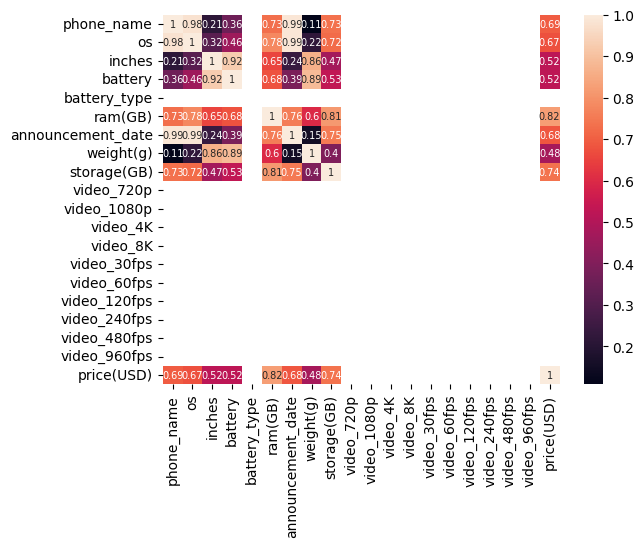

In [35]:
corr_db = treated_apple_devices.corr()
sns.heatmap(corr_db, annot=True, annot_kws={"size":7})

### Drop `"video"` and `"battery_type"`column data from `treated apple devices` data base

In [36]:
treated_apple_devices.drop(columns=["battery_type"], inplace=True)
treated_apple_devices = treated_apple_devices[treated_apple_devices.columns.drop(list(treated_apple_devices.filter(regex='video')))]
treated_apple_devices.head()

,phone_name,os,inches,resolution,battery,ram(GB),announcement_date,weight(g),storage(GB),price(USD)
62,0,0,4.7,750x1334,1821,2,0,148.0,64,210.0
63,1,1,5.8,1125x2436,2716,3,0,174.0,64,280.0
201,2,2,6.5,1242x2688,3174,4,1,208.0,64,570.0
202,3,2,5.8,1125x2436,2658,4,1,177.0,64,380.0
203,4,2,6.1,828x1792,2942,3,1,194.0,64,310.0


### Final Heatmap with correlation matrix

C:\Users\Owner\AppData\Local\Temp\ipykernel_7560\1178238320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = treated_apple_devices.corr()


<AxesSubplot: >

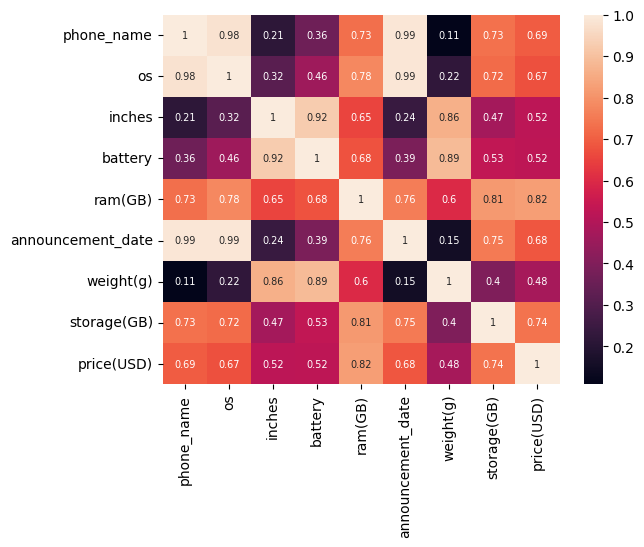

In [37]:
corr = treated_apple_devices.corr()
sns.heatmap(corr, annot=True, annot_kws = {"size":7})

## Write a model to predict next iOS devices's price

### Initializing variables and model object

In [ ]:
x_axis = treated_apple_devices[['ram(GB)', 'storage(GB)', 'OS']]
y_axis = treated_apple_devices['price(USD)']
model = LinearRegression()